In [1]:
import pandas as pd
import numpy as np

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
x_train = pd.read_csv("adult_train2.csv")
x_test = pd.read_csv("adult_test2.csv")

# 刪除特徵前

In [4]:
#訓練資料正規化
scaler = StandardScaler()
y_train_class = x_train['Class'].values
x_train_attribute = x_train.drop(labels=['Class'],axis=1)
x_train_attribute_2 = x_train_attribute.values
scaler = scaler.fit(x_train_attribute.values)
x_train_attribute_final = scaler.transform(x_train_attribute.values)

In [5]:
#測試資料正規化
scaler = StandardScaler()
y_test_class = x_test['Class'].values
x_test_attribute = x_test.drop(labels=['Class'],axis=1)
x_test_attribute_2 = x_test_attribute.values
scaler = scaler.fit(x_test_attribute.values)
x_test_attribute_final = scaler.transform(x_test_attribute.values)

In [54]:
#使用訓練資料做預測
list = []
list2 =[]
list3 =[]
k = 1
while k <= 15:
    k = k+2
    clf = KNeighborsClassifier(n_neighbors=k,weights = 'distance',algorithm = 'auto')
    clf.fit(x_train_attribute_final,y_train_class)
    y_pred = clf.predict(x_test_attribute_final)
    list.append(mean_absolute_error(y_test_class,y_pred))
    list2.append(mean_absolute_percentage_error(y_test_class,y_pred))
    list3.append(mean_squared_error(y_test_class, y_pred,squared=False))

Feature: 0, Score: 0.1418
Feature: 1, Score: 0.0835
Feature: 2, Score: 0.1283
Feature: 3, Score: 0.1114
Feature: 4, Score: 0.1478
Feature: 5, Score: 0.1191
Feature: 6, Score: 0.1309
Feature: 7, Score: 0.1072
Feature: 8, Score: 0.0395
Feature: 9, Score: 0.0784
Feature: 10, Score: 0.0428
Feature: 11, Score: 0.0263
Feature: 12, Score: 0.1138
Feature: 13, Score: 0.0254


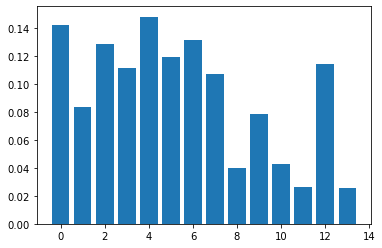

In [10]:
from sklearn.inspection import permutation_importance
list_knnimportance = []
results = permutation_importance(clf, x_train_attribute_final,y_train_class, scoring='neg_mean_squared_error')
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.4f' % (i,v))
    list_knnimportance.append(v)

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [30]:
print("置換特徵最大值:",'%.4f'%max(list_knnimportance),",特徵名稱為",x_test_attribute.columns[list_knnimportance.index(max(list_knnimportance))])
print("置換特徵最小值:",'%.4f'%min(list_knnimportance),",特徵名稱為",x_test_attribute.columns[list_knnimportance.index(min(list_knnimportance))])


置換特徵最大值: 0.1478 ,特徵名稱為 education-num
置換特徵最小值: 0.0254 ,特徵名稱為 native-country


In [31]:
x_test_attribute

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,1,7,4,6,3,2,1,0,0,39,37
1,38,2,89814,11,9,2,4,0,4,1,0,0,49,37
2,28,1,336951,7,12,2,10,0,4,1,0,0,39,37
3,44,2,160323,15,10,2,6,0,2,1,7688,0,39,37
4,34,2,198693,0,6,4,7,1,4,1,0,0,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,245211,9,13,4,9,3,4,1,0,0,39,37
15056,39,2,215419,9,13,0,9,1,4,0,0,0,35,37
15057,38,2,374983,9,13,2,9,0,4,1,0,0,49,37
15058,44,2,83891,9,13,0,0,3,1,1,5455,0,39,37


In [55]:
print('MAE:',list)
print('MAPE: ',list2)
print('RMSE: ',list3)

MAE: [0.1857901726427623, 0.1806108897742364, 0.17065073041168657, 0.1701859229747676, 0.1691899070385126, 0.16806108897742364, 0.16766268260292164, 0.16673306772908367]
MAPE:  [0.14382470119521912, 0.14259628154050466, 0.13645418326693226, 0.1360889774236388, 0.13648738379814077, 0.13605577689243029, 0.1359229747675963, 0.1355909694555113]
RMSE:  [0.4310338416444378, 0.4249833994101845, 0.4130989353795124, 0.41253596567422773, 0.4113270074265883, 0.40995254478710536, 0.4094663387910191, 0.4083296067260904]


# 刪除重要特徵

In [32]:
x_train_attribute2 = x_train.drop(labels=['Class','education-num','age','occupation'],axis=1)
y_train_class2 = x_train['Class'].values

x_test_attribute2 = x_test.drop(labels=['Class','education-num','age','occupation'],axis=1)
y_test_class2 = x_test['Class'].values

In [56]:
list = []
list2 =[]
list3 =[]
k = 1
while k <= 15:
    k = k+2
    clf = KNeighborsClassifier(n_neighbors=k,weights = 'distance',algorithm = 'auto')
    clf.fit(x_train_attribute2,y_train_class2)
    y_pred = clf.predict(x_test_attribute2)
    list.append(mean_absolute_error(y_test_class2,y_pred))
    list2.append(mean_absolute_percentage_error(y_test_class2,y_pred))
    list3.append(mean_squared_error(y_test_class2, y_pred,squared=False))
 

In [57]:
print('MAE:',list)

MAE: [0.25883134130146085, 0.24249667994687915, 0.23359893758300132, 0.22722443559096944, 0.22370517928286854, 0.22104913678618857, 0.21918990703851263, 0.21766268260292165]


In [58]:
print('MAPE: ',list2)

MAPE:  [0.20637450199203186, 0.20239043824701194, 0.20102921646746347, 0.20019920318725098, 0.200066401062417, 0.200132802124834, 0.2000996015936255, 0.20019920318725098]


In [59]:
print('RMSE: ',list3)

RMSE:  [0.5087546965890938, 0.49243951907506284, 0.4833207398643279, 0.47668064318888537, 0.4729748188676312, 0.47015862938607067, 0.4681772175560368, 0.4665433341104786]


# 刪除不重要特徵

In [41]:
x_train_attribute3 = x_train.drop(labels=['Class','native-country','capital-loss','race'],axis=1)
y_train_class3 = x_train['Class'].values

x_test_attribute3 = x_test.drop(labels=['Class','native-country','capital-loss','race'],axis=1)
y_test_class3 = x_test['Class'].values

In [60]:
list = []
list2 =[]
list3 =[]
k = 1
while k <= 15:
    k = k+2
    clf = KNeighborsClassifier(n_neighbors=k,weights = 'distance',algorithm = 'auto')
    clf.fit(x_train_attribute3,y_train_class3)
    y_pred = clf.predict(x_test_attribute3)
    list.append(mean_absolute_error(y_test_class3,y_pred))
    list2.append(mean_absolute_percentage_error(y_test_class3,y_pred))
    list3.append(mean_squared_error(y_test_class3, y_pred,squared=False))


In [61]:
print('MAE:',list)

MAE: [0.25697211155378485, 0.24362549800796812, 0.23353253652058434, 0.2290836653386454, 0.2246347941567065, 0.22138114209827356, 0.21826029216467463, 0.2156706507304117]


In [62]:
print('MAPE: ',list2)

MAPE:  [0.20255644090305444, 0.2006308100929615, 0.19877158034528553, 0.2000332005312085, 0.1997011952191235, 0.1997675962815405, 0.19926958831341302, 0.199203187250996]


In [63]:
print('RMSE: ',list3)

RMSE:  [0.5069241674587875, 0.49358433727982914, 0.4832520424380888, 0.47862685396731075, 0.4739565319274612, 0.47051157488235457, 0.467183360325124, 0.4644035429778844]
